# E-Commerce Project: Customer Live Value Prediction

## Business Understanding

### Question
What is the predicted lifetime value of a new customer?

## Data Understanding

In [1]:
# Module Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import datetime as dt

In [2]:
# Load datasets
raw_data_path = Path("../data/raw/")
customers = pd.read_csv(raw_data_path / "olist_customers_dataset.csv", dtype={'customer_zip_code_prefix': str})
orders = pd.read_csv(raw_data_path / "olist_orders_dataset.csv")
payments = pd.read_csv(raw_data_path / "olist_order_payments_dataset.csv")

In [3]:
# Review initial data
print("Customers Info:")
customers.info()
display(customers.head())
print("\n" + "="*50 + "\n")

print("Orders Info:")
orders.info()
display(orders.head())
print("\n" + "="*50 + "\n")

print("Payments Info:")
payments.info()
display(payments.head())
print("\n" + "="*50 + "\n")

Customers Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  object
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

  customer_zip_code_prefix          customer_city customer_state  
0                    14409                 franca             SP  
1                    09790  sao bernardo do campo             SP  
2                    01151              sao paulo             SP  
3                    08775        mogi das cruzes             SP  
4                    13056               campinas             SP



Orders Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00



Payments Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

In [4]:
# View statistical summaries/counts
print("---Customers per State---")
print(customers['customer_state'].value_counts())
print("\n" + "="*50 + "\n")

print("---Top 10 Customer Cities---")
print(customers['customer_city'].value_counts().head(10))
print("\n" + "="*50 + "\n")

print("---Orders Status Counts---")
print(orders['order_status'].value_counts())
print("\n" + "="*50 + "\n")

print("---Missing Order Values---")
print(orders.isnull().sum())
print("\n" + "="*50 + "\n")

print("---Payments Stat Summary---")
print(payments['payment_value'].describe().round(2))
print("\n" + "="*50 + "\n")

print("---Missing Payment Values---")
print(payments.isnull().sum())
print("\n" + "="*50 + "\n")

---Customers per State---
customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: count, dtype: int64


---Top 10 Customer Cities---
customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: count, dtype: int64


---Orders Status Counts---
order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype

---Visualizations---


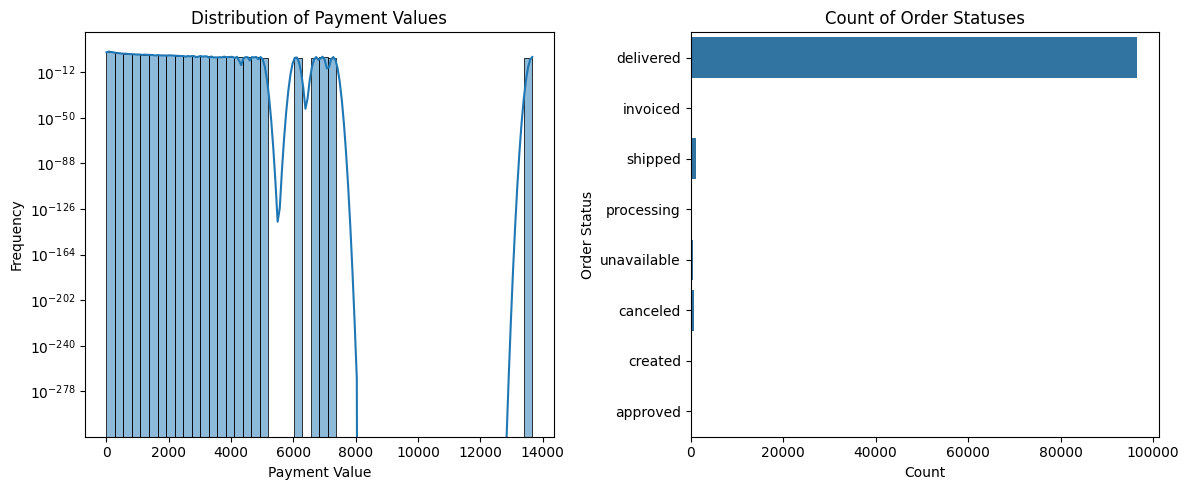

In [5]:
# Initial distribution visualizations
print("---Visualizations---")
plt.figure(figsize=(12, 5))

# Histogram for payment values
plt.subplot(1, 2, 1) #1 row, 2 cols, 1st plot
sns.histplot(payments['payment_value'], bins=50, kde=True)
plt.title("Distribution of Payment Values")
plt.xlabel("Payment Value")
plt.ylabel("Frequency")
plt.yscale('log')

# Bar chart for order statuses
plt.subplot(1, 2, 2)
sns.countplot(y=orders['order_status']) #Using y= makes labels easier to read
plt.title("Count of Order Statuses")
plt.xlabel("Count")
plt.ylabel("Order Status")

plt.tight_layout()
plt.savefig('../images/initial_plots.png')

### Data Understanding Summary
I performed a comprehensive Exploratory Data Analysis (EDA) on the raw CSV files. My process included:

1. Initial Data Loading: I loaded the separate CSV files into pandas DataFrames.
2. Structural Inspection: I reviewed each table's shape, column names, and data types.
3. Statistical Summary: I analyzed the descriptive statistics (mean, median, min, max, etc.) of key numerical columns like payment_value.
4. Categorical Analysis: I examined the distribution of values in important categorical columns, such as order_status.
5. Missing Value Assessment: I systematically counted the number of null values in every column to quantify the extent of missing data.
6. Initial Visualization: I created histograms and bar charts to visually interpret the most critical data points' distributions.

**Why I Did It**
This phase aimed to build a foundational understanding of the raw materials I would be working with. By not changing anything and only observing, I created a clear and unbiased "punch list" of tasks required in the subsequent Data Preparation phase.

This initial analysis was essential for identifying potential issues that could impact the model, such as:

- The need to merge multiple tables.
- Incorrect data types for dates and categorical IDs.
- Significant numbers of missing values are present.
- Evidence of extreme outliers and skewness in the financial data.

This phase ensured that all subsequent data preparation steps were deliberate, informed, and directly tied to a specific, identified issue.

**How I Did It**
- I used standard data analysis tools, primarily from the pandas, Matplotlib, and Seaborn libraries.
- I used pd.read_csv() to load the data.
- I used .info() and .head() for the initial structural review.
- I used .describe() to get the statistical summary.
- I used .value_counts() to analyze the categorical data.
- I used .isnull().sum() for a precise count of missing values.
- I used sns.histplot() and sns.countplot() to create the visualizations.

## Data Preparation

In [6]:
# Step 1: Merge customers to orders and then with payments
customer_orders = pd.merge(customers, orders, on='customer_id')

df_merged = pd.merge(customer_orders, payments, on='order_id')

print("---Merged DataFrame Info---")
df_merged.info()
print("\n" + "="*50 + "\n")
display(df_merged.head())

---Merged DataFrame Info---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    103886 non-null  object 
 1   customer_unique_id             103886 non-null  object 
 2   customer_zip_code_prefix       103886 non-null  object 
 3   customer_city                  103886 non-null  object 
 4   customer_state                 103886 non-null  object 
 5   order_id                       103886 non-null  object 
 6   order_status                   103886 non-null  object 
 7   order_purchase_timestamp       103886 non-null  object 
 8   order_approved_at              103711 non-null  object 
 9   order_delivered_carrier_date   101998 non-null  object 
 10  order_delivered_customer_date  100754 non-null  object 
 11  order_estimated_delivery_date  103886 non-null  object 
 12  pa

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

  customer_zip_code_prefix          customer_city customer_state  \
0                    14409                 franca             SP   
1                    09790  sao bernardo do campo             SP   
2                    01151              sao paulo             SP   
3                    08775        mogi das cruzes             SP   
4                    13056               campinas             SP   

                           order_id order_status order_purchase_timestamp  \
0  00e7ee1b050b8499577073aeb2a297a1    delivered      2017-05-16 15:05:35   
1  29150127e6685892b6eab3eec79f59c7    delivered      2018-01-12 20:48:24   
2  b2059ed67ce144a36e2aa97d2c9e9ad2    delivered      2018-05-19 16:07:45   
3  951670f92359f4fe4a63112aa7306eba    delivered      2018-03-13 16:06:38   
4  6b7d50bd145f6fc7f33cebabd7e49d0f    delivered      2018-07-29 09:51:30   

     order_approved_at order_delivered_carrier_date  \
0  2017-05-16 15:22:12          2017-05-23 10:47:57   
1  2018-01-12 20:58:32          2018-01-15 17:14:59   
2  2018-05-20 16:19:10          2018-06-11 14:31:00   
3  2018-03-13 17:29:19          2018-03-27 23:22:42   
4  2018-07-29 10:10:09          2018-07-30 15:16:00   

  order_delivered_customer_date order_estimated_delivery_date  \
0           2017-05-25 10:35:35           2017-06-05 00:00:00   
1           2018-01-29 12:41:19           2018-02-06 00:00:00   
2           2018-06-14 17:58:51           2018-06-13 00:00:00   
3           2018-03-28 16:04:25           2018-04-10 00:00:00   
4           2018-08-09 20:55:48           2018-08-15 00:00:00   

   payment_sequential payment_type  payment_installments  payment_value  
0                   1  credit_card                     2         146.87  
1                   1  credit_card                     8         335.48  
2                   1  credit_card                     7         157.73  
3                   1  credit_card                     1         173.30  
4                   1  credit_card                     8         252.25

In [7]:
## Column conversions to proper types
date_cols = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]

for col in date_cols:
    df_merged[col] = pd.to_datetime(df_merged[col], errors='coerce')

print("---Data Types After Conversion---")
df_merged.info()

---Data Types After Conversion---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    103886 non-null  object        
 1   customer_unique_id             103886 non-null  object        
 2   customer_zip_code_prefix       103886 non-null  object        
 3   customer_city                  103886 non-null  object        
 4   customer_state                 103886 non-null  object        
 5   order_id                       103886 non-null  object        
 6   order_status                   103886 non-null  object        
 7   order_purchase_timestamp       103886 non-null  datetime64[ns]
 8   order_approved_at              103711 non-null  datetime64[ns]
 9   order_delivered_carrier_date   101998 non-null  datetime64[ns]
 10  order_delivered_customer_date  100

In [8]:
# Check for potential missing delivery nulls
df_missing_delivery = df_merged[df_merged['order_delivered_customer_date'].isnull()]

# Get the count of each order status in the subset
print("Status of orders with missing delivery dates:")
print(df_missing_delivery['order_status'].value_counts())

Status of orders with missing delivery dates:
order_status
shipped        1166
canceled        658
unavailable     649
invoiced        325
processing      319
delivered         8
created           5
approved          2
Name: count, dtype: int64


In [9]:
# DataFrame for delivered-only orders
df_delivered = df_merged[df_merged['order_status'] == 'delivered'].copy()

print("\n--- Missing Values in the new 'delivered' DataFrame ---")
df_delivered.info()


--- Missing Values in the new 'delivered' DataFrame ---
<class 'pandas.core.frame.DataFrame'>
Index: 100756 entries, 0 to 103885
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    100756 non-null  object        
 1   customer_unique_id             100756 non-null  object        
 2   customer_zip_code_prefix       100756 non-null  object        
 3   customer_city                  100756 non-null  object        
 4   customer_state                 100756 non-null  object        
 5   order_id                       100756 non-null  object        
 6   order_status                   100756 non-null  object        
 7   order_purchase_timestamp       100756 non-null  datetime64[ns]
 8   order_approved_at              100742 non-null  datetime64[ns]
 9   order_delivered_carrier_date   100754 non-null  datetime64[ns]
 10  order_delivered_

In [10]:
# Take care of the missing rows by dropping as the number missing is extremely small, indicating erroneous error
df_clean = df_delivered.dropna(subset =[
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date'
]).copy()

print("--- Final Check for Missing Values ---")
df_clean.info()

--- Final Check for Missing Values ---
<class 'pandas.core.frame.DataFrame'>
Index: 100733 entries, 0 to 103885
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    100733 non-null  object        
 1   customer_unique_id             100733 non-null  object        
 2   customer_zip_code_prefix       100733 non-null  object        
 3   customer_city                  100733 non-null  object        
 4   customer_state                 100733 non-null  object        
 5   order_id                       100733 non-null  object        
 6   order_status                   100733 non-null  object        
 7   order_purchase_timestamp       100733 non-null  datetime64[ns]
 8   order_approved_at              100733 non-null  datetime64[ns]
 9   order_delivered_carrier_date   100733 non-null  datetime64[ns]
 10  order_delivered_customer_date  100

In [11]:
# Comparison of original payments and log-transformations
df_clean['payment_value_log'] = np.log1p(df_clean['payment_value'])

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_clean['payment_value'], bins=50, kde=True)
plt.title('Original Payment Distribution')
plt.xlabel('Payment Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_clean['payment_value_log'], bins=50, kde=True)
plt.title('Log-Transformed Distribution of Payments')
plt.xlabel('Log(Payment Value + 1')
plt.ylabel('Frequency')

plt.tight_layout()

### Data Preparation Summary
I executed a comprehensive data preparation workflow that included four main actions:

1. Merged Datasets: I combined the core customers, orders, and payments tables into one master DataFrame.
2. Corrected Data Types: I converted all timestamp columns into proper datetime objects and ensured categorical identifiers like zip codes were loaded as strings.
3. Handled Missing Values: I investigated, understood, and addressed the thousands of missing values in the dataset, primarily in the order delivery date columns.
4. Transformed Skewed Data: I identified and corrected the heavy right-skew and extreme outliers in the payment_value column by applying a log transformation.

**Why I Did It**<br>
Each preparation step was a deliberate action to improve the quality and usability of the data for our specific business goal.

- I merged the data to create a unified view, a fundamental requirement for analyzing the end-to-end customer journey.
- I corrected the data types to enable accurate, time-based calculations and to prevent data corruption, such as the loss of leading zeros in zip codes.
- I handled missing values to ensure the integrity of the analysis. My investigation proved that the missing data was logically linked to non-delivered orders, so my decision to filter for delivered orders focused the model on successful transactions and solved the data gap issue.
- I transformed the payment_value because extreme outliers can negatively impact machine learning models. The log transformation created a more balanced distribution, leading to a more stable and reliable model.

**How I Did It**
1. Merging: I used pandas.merge() function, sequentially joining the tables on their shared keys: customer_id and order_id.
2. Data Types: I specified dtype=str for the zip code column directly within the pd.read_csv() function on import. I applied the pd.to_datetime() function for the date columns.
3. Missing Values: I first filtered the master DataFrame to keep only rows where order_status == 'delivered'. I then used the .dropna() method to remove the remaining nulls.
4. Transformation: I used NumPy's np.log1p() function to apply a log-plus-one transformation to the payment_value column, storing the result in a new column called payment_value_log.

## Feature Engineering

In [12]:
# Engineer recency, frequency and monetary features (RFM)
snapshot_date = df_clean['order_purchase_timestamp'].max() + dt.timedelta(days=1)

df_rfm = df_clean.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (snapshot_date - x.max()).days, # Recency calculation
    'order_id': 'count', # Frequency
    'payment_value': 'sum' # Monetary
})

df_rfm.rename(columns={'order_purchase_timestamp': 'Recency',
                      'order_id': 'Frequency',
                      'payment_value': 'Monetary'}, inplace=True)

print("--- RFM Info ---")
display(df_rfm.info())
print("\n" + '='*50 + "\n")
print("--- RFM DataFrame ---")
display(df_rfm.head())

--- RFM Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 93335 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    93335 non-null  int64  
 1   Frequency  93335 non-null  int64  
 2   Monetary   93335 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 2.8+ MB


None



--- RFM DataFrame ---


Recency  Frequency  Monetary
customer_unique_id                                            
0000366f3b9a7992bf8c76cfdf3221e2      112          1    141.90
0000b849f77a49e4a4ce2b2a4ca5be3f      115          1     27.19
0000f46a3911fa3c0805444483337064      537          1     86.22
0000f6ccb0745a6a4b88665a16c9f078      321          1     43.62
0004aac84e0df4da2b147fca70cf8255      288          1    196.89

In [13]:
# Final count of number of customers in each frequency
df_rfm['Frequency'].value_counts()

Frequency
1     87872
2      4580
3       524
4       156
5        70
6        49
7        30
8        12
9         9
11        7
12        5
13        4
10        4
15        3
14        3
19        2
16        1
22        1
26        1
33        1
23        1
Name: count, dtype: int64

In [14]:
# Initial train/test split
X = df_rfm[['Recency', 'Frequency']]
y = df_rfm['Monetary']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Shape of X_train:", X_train.shape)
print("Shape of X_Test:", X_test.shape)
print("Shape of y-train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (74668, 2)
Shape of X_Test: (18667, 2)
Shape of y-train: (74668,)
Shape of y_test: (18667,)


### Feature Engineering Summary
I transformed the transaction-level df_clean DataFrame into a customer-level summary called rfm_df. Using a groupby() operation on the customer_unique_id, I created three new features for each customer, based on the industry-standard RFM framework:

1. Recency: The number of days since the customer's last purchase.
2. Frequency: The total number of purchases the customer has made.
3. Monetary: The total sum of money the customer has spent.

**Why I Did It**<br>
The business question is to predict the value of a customer, so the data needs to be structured at a customer level, with one row per customer. The raw transaction log was not suitable for this.

The RFM features were specifically chosen because they are proven, powerful predictors of a customer's future value.

- Recency measures current engagement.
- Frequency measures loyalty.
- Monetary measures direct financial contribution.

By creating these features, I provided the machine learning model with a robust, information-rich summary of each customer's behavior, which is the ideal input for predicting their lifetime value.

**How I Did It**
1. For Recency: I first established a snapshot_date (one day after the latest transaction in the dataset) to ensure a consistent point of reference. I then grouped the data by customer and, for each one, found their most recent purchase date and calculated the number of days between that date and the snapshot date.
2. For Frequency: I grouped the data by customer and simply performed a count of their order_ids.
3. For Monetary: I grouped the data by customer and performed a sum on their payment_value.

This process resulted in the rfm_df DataFrame, a perfectly structured table ready for the final stages of modeling and evaluation.

## Modeling

In [15]:
# Initialize linear regression model
lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("--- Baseline Linear Regression Results ---")
print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"R-squared (R^2): {r2:.2f}")

--- Baseline Linear Regression Results ---
Mean Absolute Error (MAE): $112.79
R-squared (R^2): 0.00


#### Linear Regression Review
R-squared for the linear regression modeling indicates that recency and frequency, in this particular dataset, have no linear relationship with the customer's monetary value. This is not entirely surprising, as approximately 90% of the customer base has only shopped once.

In [17]:
# Secondary model creation to test a non-linear approach
# Initialize the model with n_jobs=-1 to use all CPU cores
rf_model = RandomForestRegressor(n_jobs=-1, random_state=42)

rf_model.fit(X_train, y_train)

rf_y_pred = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, rf_y_pred)
r2_rf = r2_score(y_test, rf_y_pred)

print("--- Random Forest Regressor Results ---")
print(f"Mean Absolute Error (MAE): ${mae_rf:,.2f}")
print(f"R-squared (R^2): {r2_rf:.2f}")

print("\n--- Baseline Linear Regression Results (for comparison) ---")
print("Mean Absolute Error (MAE): $112.79")
print("R-squared (R²): 0.00")

--- Random Forest Regressor Results ---
Mean Absolute Error (MAE): $114.72
R-squared (R^2): -0.01

--- Baseline Linear Regression Results (for comparison) ---
Mean Absolute Error (MAE): $112.79
R-squared (R²): 0.00


#### Model 1 Testing Summary
Following the feature engineering stage, the project moved into the modeling phase. The objective was to establish a baseline performance for predicting customer Monetary value using the engineered RFM features and then attempt to improve upon that baseline with a more complex model.

**What I Did**
1. Established a Baseline: I trained and evaluated a simple Linear Regression model to serve as a performance benchmark.
2. Tested an Advanced Model: I then trained and evaluated a more powerful, non-linear Random Forest Regressor model.
3. Evaluated Performance: For both models, I calculated the Mean Absolute Error (MAE) to understand the average prediction error in dollars, and the R-squared (R²) to measure how well the features explained the target's variance.

**Why I Did It**<br>
The purpose of this two-model approach was diagnostic. By starting with a simple baseline, I could establish a minimum performance threshold. By then using a more complex model, I could determine if poor performance was due to the simplicity of the model or a more fundamental issue with the data. This process is crucial for efficiently identifying the most promising path for model improvement.

**How I Did It**<br>
I began by splitting the rfm_df into an 80% training set and a 20% testing set using scikit-learn's train_test_split function. The features (X) were Recency and Frequency, and the target (y) was Monetary. For each model, I followed the standard workflow:

1. Initialized the model (LinearRegression() or RandomForestRegressor()).
2. Trained it on the training data using the .fit() method.
3. Generated predictions on the unseen test data using the .predict() method.
4. Calculated the MAE and R² scores by comparing the predictions to the actual values.

**The Key Finding and Next Steps**<br>
The results were definitive. The Linear Regression model produced an R² of 0.00, and the more powerful Random Forest model performed even worse, yielding a negative R².

This is a critical insight. It tells us that the problem is not the complexity of the model, but the lack of predictive power in the features. The results prove that Recency and Frequency alone are not sufficient to predict a customer's total spending in this dataset.

This successfully concludes the first modeling loop by leading us to a clear, data-driven action: return to the Feature Engineering stage. The next step is to create a richer set of features that can provide a model with more information to learn from.

## Iteration 2: Model Retraining

In [25]:
# Additional dataset loading
order_items = pd.read_csv(raw_data_path / "olist_order_items_dataset.csv")
products = pd.read_csv(raw_data_path / "olist_products_dataset.csv")

df_it2 = df_clean.merge(order_items, on='order_id')
df_it2 = df_it2.merge(products, on='product_id')

df_it2['shipping_limit_date'] = pd.to_datetime(df_it2['shipping_limit_date'], errors='coerce')
df_it2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115011 entries, 0 to 115010
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    115011 non-null  object        
 1   customer_unique_id             115011 non-null  object        
 2   customer_zip_code_prefix       115011 non-null  object        
 3   customer_city                  115011 non-null  object        
 4   customer_state                 115011 non-null  object        
 5   order_id                       115011 non-null  object        
 6   order_status                   115011 non-null  object        
 7   order_purchase_timestamp       115011 non-null  datetime64[ns]
 8   order_approved_at              115011 non-null  datetime64[ns]
 9   order_delivered_carrier_date   115011 non-null  datetime64[ns]
 10  order_delivered_customer_date  115011 non-null  datetime64[ns]
 11  

## Evaluation

## Reporting